<a href="https://colab.research.google.com/github/krutika234/BSE__IIT-PATNA_OPTIMIZATION-2021/blob/main/Non_linear_programming%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1:- Sphere Function 
### Formulation

Minimize $ f(X) = \sum_{i=1}^{n} x_{i}^2$

#### To deal with non-linear functions we have used SCIPY library

SciPy module 'optimize' provides functions for minimizing (or maximizing) objective functions, possibly subject to constraints. It includes solvers for nonlinear problems (with support for both local and global optimization algorithms), linear programing, constrained and nonlinear least-squares, root finding, and curve fitting

Steps to model the non-linear problem 

1.   Installing scipy. 
2.   Define an  objective functions. 
3.   Define constraints if needed. 
4.   Provide intial guess for the parameters.
5.   Plotting the solution.



In [ ]:
# installing the scipy library 
!pip install scipy  

In [ ]:
from scipy import optimize as so  # from the module scipy import a sub module optimize. 
import numpy as np
import math

In [4]:
# declaring a sphere function

def sphere_function(x):  # def is the keyword reserved in python for declaring functions. Here we have defined a function name sphere_function with a paramter x.
    return sum(x**2.0)  # the function will return the sum of squares of the given parameter.

In [ ]:
# minimzing the above functions with the help of different optimizers

x=[-5,0,8,6,7,5,0.5,0.9] # Initial guess. Array of real elements of size (n,), where ‘n’ is the number of independent variables.
res = so.minimize(sphere_function,x,method='SLSQP') #Minimize a scalar function of one or more variables using Sequential Least Squares Programming (SLSQP).
print(res['x'])

[ 8.58049098e-09  0.00000000e+00 -1.37287852e-08 -1.02965885e-08
 -1.20126868e-08 -8.58049098e-09 -8.58049076e-10  3.79925239e-07]


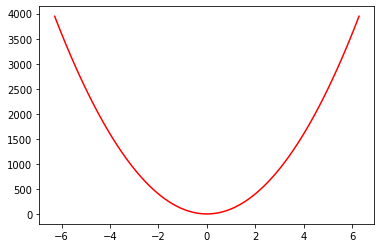

In [10]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

x= np.linspace(-2*math.pi,2*math.pi,100) #Returns num evenly spaced samples, calculated over the interval [start, stop].
y= np.linspace(-2*math.pi,2*math.pi,100)
X,Y= np.meshgrid(x,y) #Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays x1, x2,…, xn.
z = sphere_function(X)

fig = plt.figure()

# plot the function
plt.plot(x,z, 'r')

# show the plot
plt.show()



### Problem 2
[Link to the problem](https://apmonitor.com/pdc/index.php/Main/NonlinearProgramming)


Min$x_{1}x_{4}(x_{1}+x_{2}+x_{3})+x_{3}$

subject to :

$x_{1}x_{2}x_{3}x_{4}\geq 25$

$x_{1}^2+x_{2}^2+x_{3}^2+x_{4}^2=40$

$1 \leq x_{1},x_{2},x_{3},x_{4}\leq 5$

$x_{0}$=(1,5,5,1) starting point

In [ ]:
import numpy as np
from scipy.optimize import minimize

In [ ]:
def objective(x):  # function for defining objective 
    return x[0]*x[3]*(x[0]+x[1]+x[2])+x[2]

def constraint1(x): # constraint 
    return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x): # constraint
    sum_eq = 40.0
    for i in range(4):
        sum_eq = sum_eq - x[i]**2
    return sum_eq

In [ ]:
# initial guesses
n = 4
x0 = np.zeros(n)
x0[0] = 1.0
x0[1] = 5.0
x0[2] = 5.0
x0[3] = 1.0

# show initial objective
print('Initial SSE Objective: ' + str(objective(x0)))

Initial SSE Objective: 16.0


In [ ]:
# optimize
b = (1.0,5.0)
bnds = (b, b, b, b) # for bounding the value 
con1 = {'type': 'ineq', 'fun': constraint1} # first parameter signifies inequality second parameter represents function name 
con2 = {'type': 'eq', 'fun': constraint2}
cons = ([con1,con2])
solution = minimize(objective,x0,method='SLSQP',
                    bounds=bnds,constraints=cons)
x = solution.x

# show final objective
print('Final SSE Objective: ' + str(objective(x)))

Final SSE Objective: 17.01401724563517


In [ ]:
# print solution
print('Solution')
print('x1 = ' + str(x[0]))
print('x2 = ' + str(x[1]))
print('x3 = ' + str(x[2]))
print('x4 = ' + str(x[3]))

Solution
x1 = 1.0
x2 = 4.742996096883977
x3 = 3.8211546234095715
x4 = 1.379407645075325


### Problem 3:- Mishra's Bird function - constrained

[Link to the problem](https://en.wikipedia.org/wiki/Test_functions_for_optimization)


Minimize $f(x,y) = sin(y)e ^{[(1-cos(x))^2]} +cos(x)e ^{[(1-sin(y))^2]} +(x-y)^2$

Subject to :
$(x+5)^2+(y+5)^2 \leq 25$

$-10 \leq x \leq 0, -6.5 \leq y \leq 0$


In [ ]:
def mishra(x):
    return (math.sin(x[1])*math.exp((1-math.cos(x[0]))**2))+(math.cos(x[0])*math.exp((1-math.sin(x[1]))**2))+(x[0]-x[1])**2

In [ ]:
# minimzing the above functions with the help of different optimizers
from scipy import optimize as so
x=[-100,100] # intial guess for the optimizer

res = so.minimize(mishra,x,method='SLSQP')
print(res['x'])

[3.15293902 4.70104226]


In [ ]:
def constraint(x):
    return(((x[0]+5)**2+(x[1]+5)**2)-25)

cons = {'type': 'ineq', 'fun': constraint} 
xo=(-10,0)
x1=(-6.5,0)
solution = so.minimize(mishra,x,method='SLSQP',bounds=(xo,x1),constraints=cons)

print(solution['x'])
print(mishra(solution['x']))

[-9.36755953 -1.62801459]
-48.406023430510885


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


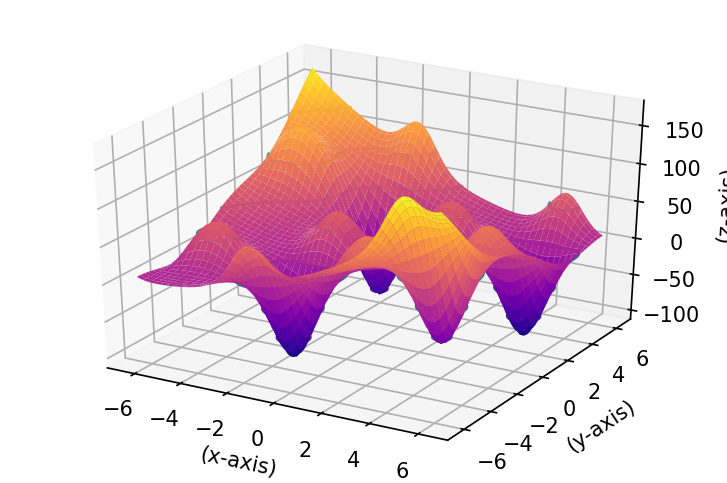

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.rcParams['figure.figsize'] = (6,4) # will help us to change the default configuration of the figure. 
plt.rcParams['figure.dpi']=150
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d') #1x1 grid

def z_function(x,y):
 return np.sin(x)*(np.exp(1-np.cos(y))**2)+np.cos(y)*(np.exp(1-np.sin(x))**2)+(x-y)**2

x= np.linspace(-2*math.pi,2*math.pi,100)
y= np.linspace(-2*math.pi,2*math.pi,100)
X,Y= np.meshgrid(x,y)
Z= z_function(X,Y)
ax.set_xlabel("(x-axis)")
ax.set_ylabel("(y-axis)")
ax.set_zlabel("(z-axis)")
ax.plot_surface(X,Y,Z,cmap='plasma')
ax.contour3D(X,Y,Z)


def plotter(E,A):
 ax.view_init(elev=E,azim=A)
 plt.title("Bird Function")
 plt.show()
 plt.contour(X,Y,Z)
#plotter(45,45)
 
